### 전체 코드

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 - 1s - loss: 23.6434 - val_loss: 1.7908
Epoch 2/200
1400/1400 - 0s - loss: 1.6749 - val_loss: 1.5499
Epoch 3/200
1400/1400 - 0s - loss: 1.4531 - val_loss: 1.3418
Epoch 4/200
1400/1400 - 0s - loss: 1.2698 - val_loss: 1.1769
Epoch 5/200
1400/1400 - 0s - loss: 1.1104 - val_loss: 1.0491
Epoch 6/200
1400/1400 - 0s - loss: 0.9725 - val_loss: 0.9017
Epoch 7/200
1400/1400 - 0s - loss: 0.8590 - val_loss: 0.7970
Epoch 8/200
1400/1400 - 0s - loss: 0.7568 - val

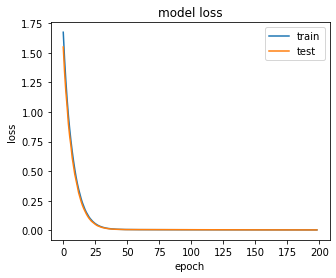

y actual value =  11.3
y predicted value = 11.228657


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

def generator_sequential_model():

    model = Sequential( [
    Input(2, name = 'input_layer'),                             #첫 Layer에서 2개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'sgd', loss = 'mse')
    return model 


def generator_linear_regression_dateset(numofsamples = 650,w1 = 3, w2 =5, b=10):
    np.random.seed(0)
    X = np.random.rand(numofsamples,2)         # 입력값을 랜덤으로 650개 생성
    coef = np.array([w1,w2])
    bias = b
    
    y = np.matmul(X,coef.transpose()) + bias    #matmul : 행렬곱
#     print(X, y)
#     print(X.shape,coef.shape, y.shape)

    return X, y

import matplotlib.pyplot as plt

def plot_loss_curve(history):
    plt.figure(figsize = (5,4))
    
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    
    plt.show()
    
def predict_new_sample(model, x, w1=3, w2=5, b = 10):
    
    x= x.reshape(1,2)
    y_pred = model.predict(x)[0][0]
    
    y_actual = w1*x[0][0] + w2*x[0][1] + b
    
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    
    

model = generator_sequential_model()
X,y = generator_linear_regression_dateset(numofsamples = 2000)
history = model.fit(X, y, epochs =200, verbose =2 , validation_split = 0.3)
plot_loss_curve(history)

predict_new_sample(model, np.array([0.1,0.2]))



-----------------------------------------------------

### 코드 분석

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

# y = 3*x1 + 5*x2 + 10


.

### 모델 생성
input data가 2개   
hidden layer의 뉴런 16개   
따라서 2*16 + 16(bias) = 48개이다.  

In [3]:
def generator_sequential_model():

    model = Sequential( [
    Input(2, name = 'input_layer'),                             #첫 Layer에서 2개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ) ,# 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer')        # 하나의 y값 받아냄
])
    #print(model.layers[0].get_weights())                       # w1 : weight 값 출력  -> 계속 변함
    #print(model.layers[1].get_weights())                      # w2 : weight 값 출력
#     model.summary()
    model.compile(optimizer = 'sgd', loss = 'mse')
    return model 


generator_sequential_model()

.


## linear regression 모델링

- Sample Data 생성  
  데이터 개수 >= [weight(파라미터)개수/ (1-정확도)]   
  65 / (1-0.9) = 650  
  따라서 650개 이상의  sample data 랜덤으로 설정  
 
- w1, w2, b 가중치와 bias 설정
- X : 샘플 데이터 랜덤으로 x1, x2 각 각 650개 생성
- 회귀계수(w1, w2) 행렬화
- matmul통해서 X와 coef 행렬곱
- sample data 통한 y 구현





In [4]:
def generator_linear_regression_dateset(numofsamples = 650,w1 = 3, w2 =5, b=10):
    np.random.seed(0)
    X = np.random.rand(numofsamples,2)         # 입력값을 랜덤으로 650개 생성
    coef = np.array([w1,w2])
    bias = b
    
    y = np.matmul(X,coef.transpose()) + bias    #matmul : 행렬곱
    return X, y

# generator_linear_regression_dateset()

.

   
## fit 함수 
- X, y 데이터 입력
- epochs : 몇 번 scan하며 모델을 만들지 결정 (충분히 주어야 학습이 된다.)
- verbose : 실제 training 할때의 과정에서 loss 값을 표현
- validation_split : 전체 데이터를 자체적으로 Train / Test 데이터로 나누어줌 ( 할당 값=a 이면, Train : 1-a만큼 사용 , Test에 a만큼 사용) 
   
1) model 구성  
2) data smaple 만들고  
3) 구성한 모델에 대해서 data sample 통해서 Training   -> fit 함수 이용   

In [8]:
# model = generator_sequential_model()
# generator_linear_regression_dateset()
# model.fit(X, y, epochs =30, verbose =2 , validation_split = 0.3)

model = generator_sequential_model()
X,y = generator_linear_regression_dateset(numofsamples = 1000)
history = model.fit(X, y, epochs =30, verbose =2 , validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 2/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 3/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 4/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 5/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 6/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 7/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 8/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 9/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 10/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 11/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 12/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 13/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 14/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 15/30
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 16/30
700/70

.

## plot_loss_curve Graph  
- history에 따라 나오는 값들(epoch가 증가함에따라 loss의 변화량) 그래프로 알아보기 위한 함수
- figure : 크기 
- 각 loss들을 plot
- 제목 x,y축 이름
- 각 곡선의 이름 라벨링

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    plt.figure(figsize = (6,4))
    
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    
    plt.show()

In [ ]:
plot_loss_curve(histroy)

In [ ]:
histroy1 = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X, y, epochs =90, verbose =2 , validation_split = 0.3)


In [ ]:

plot_loss_curve(histroy1)
plot_loss_curve(histroy2 )

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 2/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 3/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 4/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 5/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 6/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 7/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 8/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 9/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 10/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 11/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 12/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 13/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 14/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epoch 15/100
700/700 - 0s - loss: 199.1064 - val_loss: 201.6477
Epo

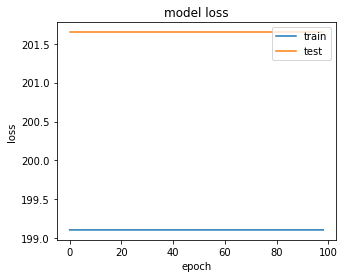

In [9]:
histroy2 = model.fit(X, y, epochs =100, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy2 )

위에서 볼 수 있듯이 epochs 값이 증가함에 따라 loss가 감소함을 볼 수 있다.  
따라서 비슷하던 곡선 epoch - loss 곡선도 선형모형에 비슷한 직선으로 변화가 되어가고있다.  

.


또한 sample의 개수에 따른 아래의 그래프 변화를 관찰해보면, 

sample의 개수가 증가할 수록 loss의 범위도 작아지게 된다.
sample의 개수가 50일때 loss의 범위는 20단위로 140이상까지 증가하게 된다. 

하지만 sample 개수가 100개 일때는, loss의 범위가 모두 2 이하로 나타나게 된다.



In [ ]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 50)
X2,y2 = generator_linear_regression_dateset(numofsamples = 100)
histroy1 = model.fit(X1, y1, epochs =30, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X2, y2, epochs =30, verbose =2 , validation_split = 0.3)

plot_loss_curve(histroy1)
plot_loss_curve(histroy2)

그러면 sample의 개수가 적을때, epochs 값을 증가시키면 어떻게 될까? 


Train on 35 samples, validate on 15 samples
Epoch 1/20
35/35 - 0s - loss: 176.6255 - val_loss: 102.2593
Epoch 2/20
35/35 - 0s - loss: 113.5951 - val_loss: 61.8075
Epoch 3/20
35/35 - 0s - loss: 70.6824 - val_loss: 35.9816
Epoch 4/20
35/35 - 0s - loss: 42.8166 - val_loss: 20.7550
Epoch 5/20
35/35 - 0s - loss: 25.9317 - val_loss: 11.9852
Epoch 6/20
35/35 - 0s - loss: 15.7904 - val_loss: 6.6119
Epoch 7/20
35/35 - 0s - loss: 9.2852 - val_loss: 3.6367
Epoch 8/20
35/35 - 0s - loss: 5.4030 - val_loss: 2.1765
Epoch 9/20
35/35 - 0s - loss: 3.2017 - val_loss: 1.6120
Epoch 10/20
35/35 - 0s - loss: 2.0041 - val_loss: 1.5919
Epoch 11/20
35/35 - 0s - loss: 1.7819 - val_loss: 1.6703
Epoch 12/20
35/35 - 0s - loss: 1.6185 - val_loss: 1.7697
Epoch 13/20
35/35 - 0s - loss: 1.5702 - val_loss: 1.8174
Epoch 14/20
35/35 - 0s - loss: 1.5605 - val_loss: 1.7139
Epoch 15/20
35/35 - 0s - loss: 1.5618 - val_loss: 1.7798
Epoch 16/20
35/35 - 0s - loss: 1.5365 - val_loss: 1.7283
Epoch 17/20
35/35 - 0s - loss: 1.5317 -

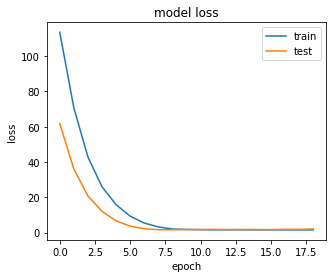

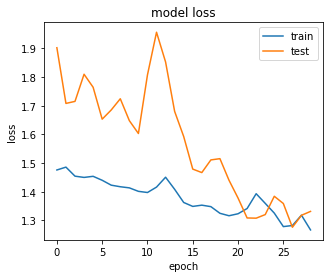

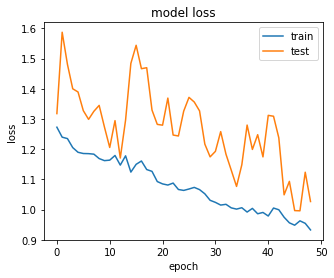

In [13]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 50)
histroy1 = model.fit(X1, y1, epochs =20, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X1, y1, epochs =30, verbose =2 , validation_split = 0.3)
histroy3 = model.fit(X1, y1, epochs =50, verbose =2 , validation_split = 0.3)

plot_loss_curve(histroy1)
plot_loss_curve(histroy2)
plot_loss_curve(histroy3)

위에서 볼 수 있듯이 epoch값이 많으면 많아질수록 loss가 감소하지만, 일정량이 되면 그 감소 범위도 줄어들게 된다.
하지만 sample data가 많아지는것에비해 epochs만 증가하는 것은 큰 변동(불안정)이 있다.
따라서 sample data를 많이 확보하는것이 정확도를 높일수 있게된다.

### 따라서 sample개수는 많으면 많을수록 좋다. 
### 왜냐하면 tensorflow는 딥러닝기반, 다시말해서 복잡한 신경망(Deep Neural Network) 기반이기때문에
### 데이터가 많으면 많을 수록 더 좋은 성능을 나타낼 수 있다. (loss 비용 감소)

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 - 0s - loss: 35.1824 - val_loss: 2.0181
Epoch 2/50
700/700 - 0s - loss: 1.7397 - val_loss: 1.6961
Epoch 3/50
700/700 - 0s - loss: 1.5890 - val_loss: 1.5656
Epoch 4/50
700/700 - 0s - loss: 1.4685 - val_loss: 1.4571
Epoch 5/50
700/700 - 0s - loss: 1.3653 - val_loss: 1.3424
Epoch 6/50
700/700 - 0s - loss: 1.2739 - val_loss: 1.2552
Epoch 7/50
700/700 - 0s - loss: 1.1810 - val_loss: 1.1594
Epoch 8/50
700/700 - 0s - loss: 1.0973 - val_loss: 1.0816
Epoch 9/50
700/700 - 0s - loss: 1.0202 - val_loss: 1.0201
Epoch 10/50
700/700 - 0s - loss: 0.9529 - val_loss: 0.9344
Epoch 11/50
700/700 - 0s - loss: 0.8823 - val_loss: 0.8674
Epoch 12/50
700/700 - 0s - loss: 0.8188 - val_loss: 0.8073
Epoch 13/50
700/700 - 0s - loss: 0.7638 - val_loss: 0.7554
Epoch 14/50
700/700 - 0s - loss: 0.7101 - val_loss: 0.7036
Epoch 15/50
700/700 - 0s - loss: 0.6617 - val_loss: 0.6557
Epoch 16/50
700/700 - 0s - loss: 0.6142 - val_loss: 0.6039
Epoch 17/50
700/70

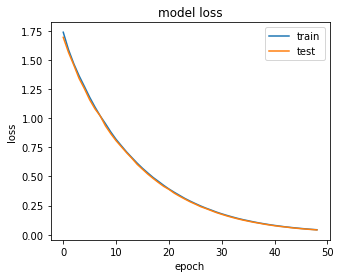

In [14]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 1000)
histroy1 = model.fit(X1, y1, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy1)

loss = 0.0034 , val_loss = 0.0034
이처럼 0에 수렴하는 값을 할당받을 수 있다.

.

### 이제 예측을 해보겠습니다.

- model은 


In [15]:
def predict_new_sample(model, x, w1=3, w2=5, b = 10):
    
    x= x.reshape(1,2)
    y_pred = model.predict(x)[0][0]
    
    y_actual = w1*x[0][0] + w2*x[0][1] + b
    
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    

Train on 35 samples, validate on 15 samples
Epoch 1/50
35/35 - 0s - loss: 0.0282 - val_loss: 0.0262
Epoch 2/50
35/35 - 0s - loss: 0.0276 - val_loss: 0.0256
Epoch 3/50
35/35 - 0s - loss: 0.0275 - val_loss: 0.0276
Epoch 4/50
35/35 - 0s - loss: 0.0276 - val_loss: 0.0268
Epoch 5/50
35/35 - 0s - loss: 0.0274 - val_loss: 0.0275
Epoch 6/50
35/35 - 0s - loss: 0.0274 - val_loss: 0.0272
Epoch 7/50
35/35 - 0s - loss: 0.0272 - val_loss: 0.0262
Epoch 8/50
35/35 - 0s - loss: 0.0269 - val_loss: 0.0267
Epoch 9/50
35/35 - 0s - loss: 0.0269 - val_loss: 0.0278
Epoch 10/50
35/35 - 0s - loss: 0.0270 - val_loss: 0.0240
Epoch 11/50
35/35 - 0s - loss: 0.0260 - val_loss: 0.0230
Epoch 12/50
35/35 - 0s - loss: 0.0261 - val_loss: 0.0243
Epoch 13/50
35/35 - 0s - loss: 0.0258 - val_loss: 0.0235
Epoch 14/50
35/35 - 0s - loss: 0.0257 - val_loss: 0.0250
Epoch 15/50
35/35 - 0s - loss: 0.0257 - val_loss: 0.0233
Epoch 16/50
35/35 - 0s - loss: 0.0254 - val_loss: 0.0232
Epoch 17/50
35/35 - 0s - loss: 0.0253 - val_loss: 0.0

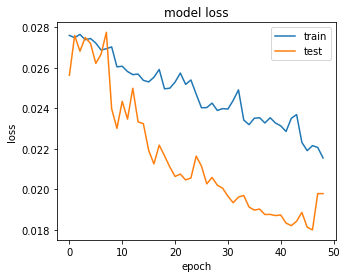

y actual value =  11.3
y predicted value = 11.453131


In [16]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))

Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 - 0s - loss: 0.0263 - val_loss: 0.0402
Epoch 2/50
210/210 - 0s - loss: 0.0257 - val_loss: 0.0395
Epoch 3/50
210/210 - 0s - loss: 0.0252 - val_loss: 0.0385
Epoch 4/50
210/210 - 0s - loss: 0.0248 - val_loss: 0.0373
Epoch 5/50
210/210 - 0s - loss: 0.0242 - val_loss: 0.0373
Epoch 6/50
210/210 - 0s - loss: 0.0237 - val_loss: 0.0361
Epoch 7/50
210/210 - 0s - loss: 0.0231 - val_loss: 0.0358
Epoch 8/50
210/210 - 0s - loss: 0.0227 - val_loss: 0.0353
Epoch 9/50
210/210 - 0s - loss: 0.0222 - val_loss: 0.0351
Epoch 10/50
210/210 - 0s - loss: 0.0217 - val_loss: 0.0336
Epoch 11/50
210/210 - 0s - loss: 0.0214 - val_loss: 0.0328
Epoch 12/50
210/210 - 0s - loss: 0.0208 - val_loss: 0.0333
Epoch 13/50
210/210 - 0s - loss: 0.0205 - val_loss: 0.0319
Epoch 14/50
210/210 - 0s - loss: 0.0200 - val_loss: 0.0320
Epoch 15/50
210/210 - 0s - loss: 0.0196 - val_loss: 0.0307
Epoch 16/50
210/210 - 0s - loss: 0.0192 - val_loss: 0.0307
Epoch 17/50
210/210 

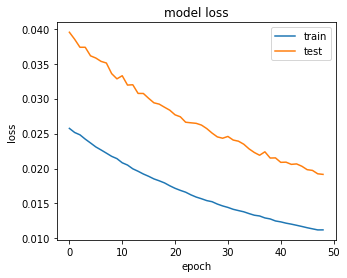

y actual value =  11.3
y predicted value = 11.327087


In [17]:
X,y = generator_linear_regression_dateset(numofsamples = 300)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 35 samples, validate on 15 samples
Epoch 1/20
35/35 - 0s - loss: 0.0087 - val_loss: 0.0057
Epoch 2/20
35/35 - 0s - loss: 0.0086 - val_loss: 0.0056
Epoch 3/20
35/35 - 0s - loss: 0.0086 - val_loss: 0.0056
Epoch 4/20
35/35 - 0s - loss: 0.0087 - val_loss: 0.0057
Epoch 5/20
35/35 - 0s - loss: 0.0086 - val_loss: 0.0061
Epoch 6/20
35/35 - 0s - loss: 0.0087 - val_loss: 0.0056
Epoch 7/20
35/35 - 0s - loss: 0.0085 - val_loss: 0.0059
Epoch 8/20
35/35 - 0s - loss: 0.0086 - val_loss: 0.0055
Epoch 9/20
35/35 - 0s - loss: 0.0084 - val_loss: 0.0055
Epoch 10/20
35/35 - 0s - loss: 0.0084 - val_loss: 0.0054
Epoch 11/20
35/35 - 0s - loss: 0.0084 - val_loss: 0.0057
Epoch 12/20
35/35 - 0s - loss: 0.0085 - val_loss: 0.0063
Epoch 13/20
35/35 - 0s - loss: 0.0089 - val_loss: 0.0056
Epoch 14/20
35/35 - 0s - loss: 0.0084 - val_loss: 0.0054
Epoch 15/20
35/35 - 0s - loss: 0.0083 - val_loss: 0.0054
Epoch 16/20
35/35 - 0s - loss: 0.0082 - val_loss: 0.0053
Epoch 17/20
35/35 - 0s - loss: 0.0082 - val_loss: 0.0

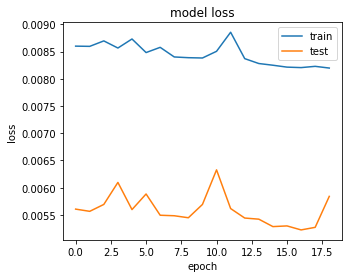

y actual value =  11.3
y predicted value = 11.3264885


In [18]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =20, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 35 samples, validate on 15 samples
Epoch 1/50
35/35 - 0s - loss: 0.0085 - val_loss: 0.0054
Epoch 2/50
35/35 - 0s - loss: 0.0082 - val_loss: 0.0052
Epoch 3/50
35/35 - 0s - loss: 0.0081 - val_loss: 0.0052
Epoch 4/50
35/35 - 0s - loss: 0.0081 - val_loss: 0.0051
Epoch 5/50
35/35 - 0s - loss: 0.0081 - val_loss: 0.0051
Epoch 6/50
35/35 - 0s - loss: 0.0081 - val_loss: 0.0051
Epoch 7/50
35/35 - 0s - loss: 0.0082 - val_loss: 0.0051
Epoch 8/50
35/35 - 0s - loss: 0.0083 - val_loss: 0.0051
Epoch 9/50
35/35 - 0s - loss: 0.0082 - val_loss: 0.0051
Epoch 10/50
35/35 - 0s - loss: 0.0083 - val_loss: 0.0050
Epoch 11/50
35/35 - 0s - loss: 0.0081 - val_loss: 0.0050
Epoch 12/50
35/35 - 0s - loss: 0.0080 - val_loss: 0.0050
Epoch 13/50
35/35 - 0s - loss: 0.0079 - val_loss: 0.0052
Epoch 14/50
35/35 - 0s - loss: 0.0080 - val_loss: 0.0053
Epoch 15/50
35/35 - 0s - loss: 0.0080 - val_loss: 0.0050
Epoch 16/50
35/35 - 0s - loss: 0.0079 - val_loss: 0.0049
Epoch 17/50
35/35 - 0s - loss: 0.0079 - val_loss: 0.0

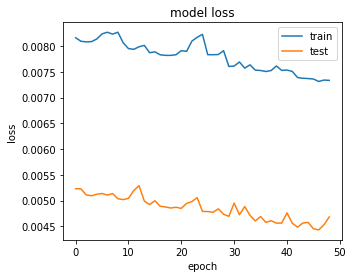

y actual value =  11.3
y predicted value = 11.30534


In [19]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 - 0s - loss: 0.0119 - val_loss: 0.0116
Epoch 2/100
700/700 - 0s - loss: 0.0115 - val_loss: 0.0111
Epoch 3/100
700/700 - 0s - loss: 0.0111 - val_loss: 0.0108
Epoch 4/100
700/700 - 0s - loss: 0.0108 - val_loss: 0.0105
Epoch 5/100
700/700 - 0s - loss: 0.0104 - val_loss: 0.0102
Epoch 6/100
700/700 - 0s - loss: 0.0101 - val_loss: 0.0099
Epoch 7/100
700/700 - 0s - loss: 0.0098 - val_loss: 0.0097
Epoch 8/100
700/700 - 0s - loss: 0.0095 - val_loss: 0.0096
Epoch 9/100
700/700 - 0s - loss: 0.0094 - val_loss: 0.0093
Epoch 10/100
700/700 - 0s - loss: 0.0092 - val_loss: 0.0090
Epoch 11/100
700/700 - 0s - loss: 0.0090 - val_loss: 0.0088
Epoch 12/100
700/700 - 0s - loss: 0.0088 - val_loss: 0.0087
Epoch 13/100
700/700 - 0s - loss: 0.0086 - val_loss: 0.0085
Epoch 14/100
700/700 - 0s - loss: 0.0085 - val_loss: 0.0084
Epoch 15/100
700/700 - 0s - loss: 0.0083 - val_loss: 0.0083
Epoch 16/100
700/700 - 0s - loss: 0.0083 - val_loss: 0.0082
Epo

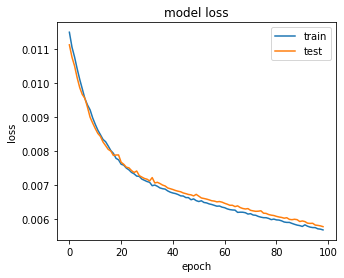

y actual value =  11.3
y predicted value = 11.209494


In [20]:
X,y = generator_linear_regression_dateset(numofsamples = 1000)
histroy = model.fit(X, y, epochs =100, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))

## 결론
  
tensorflow의 keras를 통해 신경망으로 선형회귀문제를 풀었습니다.  
실제 값 11.3에 11.262 까지 근접한 값을 얻을 수 있었으므로, 선형회귀문제를 풀었다고 할 수 있습니다.  
  
따라서 이처럼 딥러닝(신경망)으로 선형회귀 문제를 풀 수 있고, 다른 문제들도 풀 수 있다고 합니다.  
전제 조건으로는, 학습시키기에 충분한 데이터가 주어진다면 입니다.  

#### 따라서, 충분한 데이터가 주어지고 성능이 좋은 컴퓨터가있다면, 딥러닝을통해 많은 머신러닝 문제를 풀 수 있게 됩니다!



